In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = pd.read_csv("A1_dataset.csv")
pos=""
neg=""
neg_=[]
pos_=[]
for i,d in dataset.iterrows():
    if d["LABEL"]==0:
        neg = d["TEXT"]
        break
for i,d in dataset.iterrows():
    if d["LABEL"]==1:
        pos =d["TEXT"]
        break

In [ ]:
neg = re.sub(r"(\<\w+> )|(\bwww.\w+.\w+/?\w* )|(\bhttp://\w+.\w+/\w+ )",'',neg)
print(neg)

About to get threaded and scared 


In [ ]:
neg = re.sub(r'\s\s+',' ',neg) 
print(neg)

About to get threaded and scared 


In [ ]:
neg_= word_tokenize(neg)
print(neg_)
pos_= word_tokenize(pos)
print(pos_)


['About', 'to', 'get', 'threaded', 'and', 'scared']
['@', 'awaisnaseer', 'I', 'like', 'Shezan', 'Mangooo', 'too', '!', '!', '!', 'I', 'had', 'one', 'yesterday']


In [ ]:
neg = re.sub(r'[^\w\s]',' ',neg)
print(neg)

About to get threaded and scared 


In [ ]:
!sudo apt-get install -y swig3.0
!pip install jamspell

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig3.0 is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget -nc https://github.com/bakwc/JamSpell-models/raw/master/en.tar.gz
!tar -xf en.tar.gz

File ‘en.tar.gz’ already there; not retrieving.



In [ ]:
import jamspell
corrector = jamspell.TSpellCorrector()
corrector.LoadLangModel('en.bin')
neg = corrector.FixFragment(neg)
neg_ = word_tokenize(neg)
print(neg)

About to get threaded and scared 


In [ ]:
lemmatizer = WordNetLemmatizer()
neg=""
s_=[]
for c in neg_:
  a = lemmatizer.lemmatize(c)
  s_.append(a)
  neg = neg+" "+a
neg_ = s_
print(neg)

 About to get threaded and scared


In [ ]:
ps = PorterStemmer()
neg=""
s_=[]
for c in neg_:
  a = ps.stem(c)
  s_.append(a)
  neg= neg+" "+a
neg_=s_
print(neg)

 about to get thread and scare


In [ ]:
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
neg = pattern.sub('', neg)
print(neg)

 get thread scare


In [ ]:
dataset = pd.read_csv("A1_dataset.csv")
text=""
text_l=[]
columns_n = ['TEXT','LABEL']
positive_df = pd.DataFrame(columns=columns_n)
negative_df = pd.DataFrame(columns=columns_n)
for i,d in dataset.iterrows():
  text = d["TEXT"]
  text = re.sub(r"(\<\w+> )|(\bwww.\w+.\w+/?\w* )|(\bhttp://\w+.\w+/\w+ )",'',text)
  text = re.sub(r'\s\s+',' ',text) 
  text_l= word_tokenize(text)
  text = re.sub(r'[^\w\s]',' ',text)
  text = corrector.FixFragment(text)
  text_l = word_tokenize(str(text))
  lemmatizer = WordNetLemmatizer()
  text=""
  s_=[]
  for c in text_l:
    a = lemmatizer.lemmatize(c)
    s_.append(a)
    text = text+" "+a
    text_l = s_
  ps = PorterStemmer()
  text=""
  s_=[]
  for c in text_l:
    a = ps.stem(c)
    s_.append(a)
    text= text+" "+a
  text_l=s_
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = pattern.sub('', text)
  if d["LABEL"]==0:
    negative_df = negative_df.append({'TEXT':text},ignore_index=True)
  elif d["LABEL"]==1:
    positive_df = positive_df.append({'TEXT':text},ignore_index=True)
negative_df.to_csv("negative_data.csv")
positive_df.to_csv("positive_data.csv")


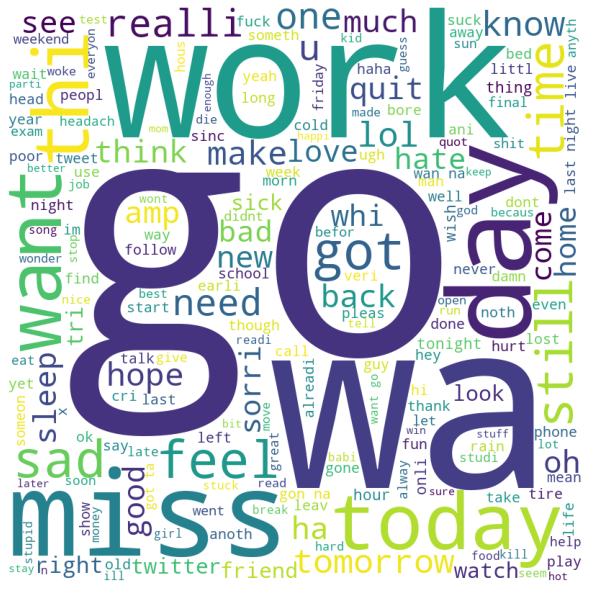

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"negative_data.csv")
sentences = ''
stopwords = set(STOPWORDS)
for val in df.TEXT:
	val = str(val)
	tokens = val.split()
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	sentences += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(sentences)
				
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


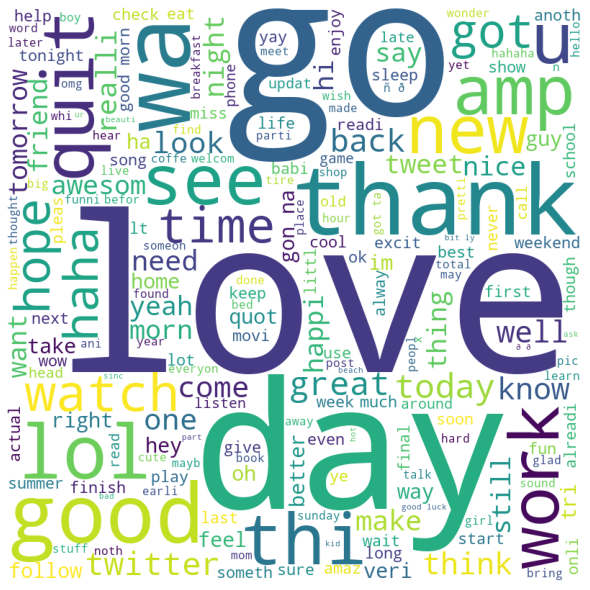

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"positive_data.csv")
sentences = ''
stopwords = set(STOPWORDS)
for val in df.TEXT:
	val = str(val)
	tokens = val.split()
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	sentences += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(sentences)
				
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Sentiment Analysis for preprocessed text(obtained in part II)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
arr_pos=[] #processed data
arr_neg=[]
arr_raw=[] #raw data
def sentiment_scores(sentence,senti,p):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_dict = analyzer.polarity_scores(sentence)
    if p==True:
      if senti==1:
        if sentiment_dict['compound'] >= 0 :
          arr_pos.append(1)
        else:
          arr_pos.append(0)
      elif senti==0:
        if sentiment_dict['compound'] >= 0 :
          arr_neg.append(1)
        else:
          arr_neg.append(0)
    else:
      if sentiment_dict['compound'] >= 0 :
        arr_raw.append(1)
      else:
        arr_raw.append(0)
df_pos = pd.read_csv('positive_data.csv')
df_neg = pd.read_csv('negative_data.csv')
for i,d in df_pos.iterrows():
  sentiment_scores(d['TEXT'],1,True)
for i,d in df_neg.iterrows():
  sentiment_scores(d['TEXT'],0,True)
df_pos['LABEL'] = arr_pos
df_neg['LABEL'] = arr_neg


In [ ]:
df_pos.to_csv("negative_data.csv")
df_neg.to_csv("positive_data.csv")

In [ ]:
pos_count=0
neg_count=0
for s in df_pos.LABEL:
  if(s==0):
    pos_count = pos_count+1
for s in df_neg.LABEL:
  if(s==1):
    neg_count = neg_count+1
total = df_pos.shape[0]+df_neg.shape[0]
accuracy = (total-(pos_count+neg_count))/total
print(accuracy)

0.6496384418007931


Sentiment Analysis for raw text

In [ ]:
raw_data = pd.read_csv("A1_dataset.csv")
for s in raw_data.TEXT:
  sentiment_scores(s,0,False)
raw_data['V_LABEL'] = arr_raw
count=0
raw_data.to_csv("raw_data.csv")
raw_data = pd.read_csv("raw_data.csv")
for i,s in raw_data.iterrows():
  if s['V_LABEL']== s['LABEL']:
    count = count+1
accuracy = count/(raw_data.shape[0])
print(accuracy)

0.6862607884301376
